In [343]:
import sys
sys.path.append('../skysurvey')
import skysurvey

In [344]:
bbh = skysurvey.BBHFlare.BBH()
type(bbh)

skysurvey.target.BBHFlare.BBH

In [369]:
bbh.data
#bbh.data is empty

In [346]:
##bbh.draw(size = 10)

In [347]:
type(bbh.template)

skysurvey.template.Template

In [348]:
### band = ['ztfr','ztfg']
# times = [ 1,2,3]

# fig = bbh.get_lightcurve(band, times)
# fig
# bbh.show_lightcurve(["ztfg","ztfr"], index = 50)

In [349]:
#CREATING A SURVEY
from shapely import geometry
footprint = geometry.Point(0,0).buffer(2) ##circle of radius 2 centered at 0,0

## fields, different locations of the sky
import numpy as np
radec = {'C1': {'dec': -27.11161, 'ra': 54.274292+180},  
         'C2': {'dec': -29.08839, 'ra': 54.274292+180},
         'C3': {'dec': -28.10000, 'ra': 52.648417+180}
         }

# observing logs
size = 10_000 ##number of observations to simulate

data = {}
data["gain"] = 1
data["zp"] = 30
data["skynoise"] = np.random.normal(size=size, loc=200, scale=20)
data["mjd"] = np.random.uniform(56_000, 56_200, size=size)
data["band"] = "desr" #np.random.choice(["desg","desr","desi"], size=size)

data["fieldid"] = np.random.choice(list(radec.keys()), size=size)


## Creating a GridSurvey
survey = skysurvey.GridSurvey.from_pointings(data, radec,
                                             footprint=footprint)

In [371]:
#dataset = skysurvey.DataSet.from_targets_and_survey(bbh, survey)
#dataset.data
#doesnt work bc .data is empty for some reason

In [352]:
import sncosmo
import numpy as np

In [374]:
wave = np.linspace(3600,8000,6)

tr = np.random.uniform(10,100)
td = np.random.uniform(tr,200)
t0 = np.random.uniform(58300,60500)
A = np.random.uniform(50,1000)


times = np.linspace(t0 - tr,t0 + td,1000)
times = np.unique(np.concatenate(([t0],times))) #making sure t0 is in there


fluxes = np.empty(len(times))
for i, time in enumerate(times):
    if i == 0:
        fluxes[0] = 0
    elif i != 0:
        if time == t0:
            flux = A         
        elif time < t0: #rising
            flux = fluxes[i-1] + (A/tr * (times[i] - times[i-1]))
        elif time > t0: #decaying
            flux = fluxes[i-1] + (-A/td * (times[i] - times[i-1])) 

        fluxes[i] = flux
    
#This block of code is to fix the formatting of the 'fluxes' variable so that it can work in sncosmo.TimeSeriesSource()
list2 = []
for flux in fluxes:
    list1 = []
    for i in range(len(wave)): #len(wave) = number of wavelengths
        list1.append(flux)
    list2.append(list1)
fluxes = list2
fluxes = np.array(fluxes)

In [375]:

bbh3 = skysurvey.BBHFlare.BBH.from_draw(size=4000, source = sncosmo.TimeSeriesSource(times, wave, np.array(fluxes)))

/Users/rebekahblackmon/Downloads/2024SURF/../skysurvey/skysurvey/target/core.py:184: UserWarning: Deprecation warning: source option is now called template
  warnings.warn("Deprecation warning: source option is now called template")


In [355]:
bbh.template_parameters #Not sure where these are defined. The output is the same for SN class.

['z', 't0', 'amplitude']

In [356]:
bbh3.data
#.data is finally not empty. I think the issue was that I wasn't using from_draw function. from_draw function creates and instance + loads data attribute
#POTENTIAL PROBLEM:
#   flux and times aren't included because they aren't in the MODEL dictionary. I know how to include times, but am having trouble adding flux.

,z,t0,ra,dec,template
0,0.11045,59568.839844,256.521057,55.643692,None
1,0.19435,59147.378906,160.321899,61.565147,None
2,0.09605,59663.632812,123.536850,-33.658722,None
3,0.18795,58584.781250,32.598846,-12.685643,None
4,0.11845,59417.992188,61.758526,-32.859760,None
...,...,...,...,...,...
3995,0.16435,59287.210938,311.827759,-27.267477,None
3996,0.19465,60448.652344,303.433502,41.944332,None
3997,0.16425,60089.917969,160.962112,-20.049744,None
3998,0.16875,59891.109375,194.466690,25.864855,None


In [376]:
band = ['ztfr','ztfg']
times = [ 1,2,3]
bbh3.get_lightcurve(band, times)

before any acc code, sncosmo_model =None
after some code, sncosmo_model = <Model at 0x166d34110>
source:
  class      : TimeSeriesSource
  name       : None
  version    : None
  phases     : [59791.3, .., 60004] days
  wavelengths: [3600, .., 8000] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 1.0, and its type is<class 'sncosmo.models.Model'>


array([[685.76547888, 685.76547888, 685.76547888],
       [-21.82886236, -21.82886236, -21.82886236]])

In [377]:

#bbh3.show_lightcurve(["ztfg","ztfr"], index = 50)

In [378]:
dataset = skysurvey.DataSet.from_targets_and_survey(bbh3, survey)
dataset.data

/Users/rebekahblackmon/Downloads/2024SURF/../skysurvey/skysurvey/dataset.py:811: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  this_survey = gsurvey_indexed.get_group(index_).copy()
/Users/rebekahblackmon/Downloads/2024SURF/../skysurvey/skysurvey/dataset.py:811: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  this_survey = gsurvey_indexed.get_group(index_).copy()


fieldid          time  band          flux     fluxerr  zp zpsys
index                                                                     
1692  6070      C2  56000.066406  desr  -9810.982156  201.709437  30    ab
      8518      C2  56000.183594  desr -10300.318263  194.573978  30    ab
      9612      C2  56000.253906  desr -10276.472170  213.580332  30    ab
      6608      C2  56000.273438  desr -10251.211577  253.848695  30    ab
      5908      C2  56000.312500  desr -10344.972523  224.865098  30    ab
...            ...           ...   ...           ...         ...  ..   ...
      2212      C3  56199.632812  desr -10020.715224  229.283079  30    ab
      1838      C3  56199.683594  desr  -9890.939144  234.121621  30    ab
      6400      C3  56199.753906  desr -10315.101834  242.879165  30    ab
      8437      C3  56199.781250  desr -10311.544855  240.864361  30    ab
      8570      C3  56199.781250  desr  -9854.049585  235.634863  30    ab

[6593 rows x 7 columns]

In [379]:
data = dataset.data

In [380]:
data

fieldid          time  band          flux     fluxerr  zp zpsys
index                                                                     
1692  6070      C2  56000.066406  desr  -9810.982156  201.709437  30    ab
      8518      C2  56000.183594  desr -10300.318263  194.573978  30    ab
      9612      C2  56000.253906  desr -10276.472170  213.580332  30    ab
      6608      C2  56000.273438  desr -10251.211577  253.848695  30    ab
      5908      C2  56000.312500  desr -10344.972523  224.865098  30    ab
...            ...           ...   ...           ...         ...  ..   ...
      2212      C3  56199.632812  desr -10020.715224  229.283079  30    ab
      1838      C3  56199.683594  desr  -9890.939144  234.121621  30    ab
      6400      C3  56199.753906  desr -10315.101834  242.879165  30    ab
      8437      C3  56199.781250  desr -10311.544855  240.864361  30    ab
      8570      C3  56199.781250  desr  -9854.049585  235.634863  30    ab

[6593 rows x 7 columns]

In [381]:
g_times = []
g_flux = []
r_times = []
r_flux = []
i_times = []
i_flux = []

#ab.band_flux_to_mag
#ab.band_flux_to_mag()
for i in range(len(data)):
    datapoint = data.iloc[i]

    if datapoint['band'] == 'desr':
        r_times.append(datapoint['time'])
        r_flux.append(datapoint['flux'])

    elif datapoint['band'] == 'desg':
        g_times.append(datapoint['time'])
        g_flux.append(datapoint['flux'])

    elif datapoint['band'] == 'desi':
        i_times.append(datapoint['time'])
        i_flux.append(datapoint['flux'])


In [382]:
import matplotlib.pyplot as plt

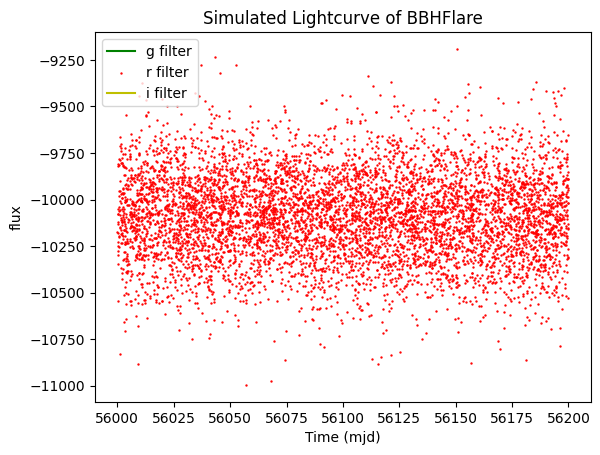

In [383]:


plt.figure()
plt.plot(g_times,g_flux, color = 'g', label = 'g filter')
plt.scatter(r_times, r_flux, color = 'r', label = 'r filter',s = 0.5)
plt.plot(i_times, i_flux, color = 'y', label = 'i filter')
plt.title("Simulated Lightcurve of BBHFlare")
plt.xlabel('Time (mjd)')
plt.ylabel('flux')
plt.legend()

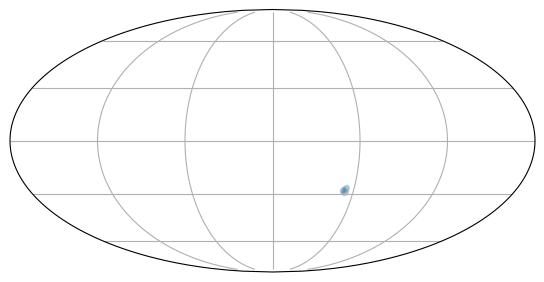

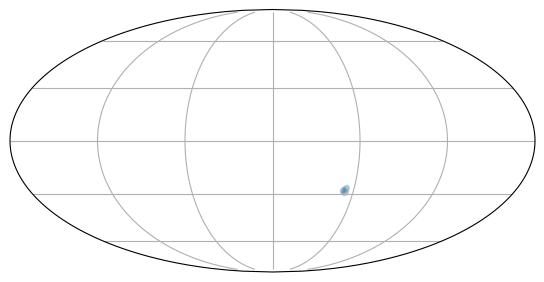

In [384]:

survey.show()

In [385]:
#Trying a different survey, however skysurvey docs mentioned you need a password in order to user ZTF survey???
survey2 = skysurvey.ZTF



In [386]:
type(survey2)

type

In [368]:
dataset2 = skysurvey.DataSet.from_targets_and_survey(bbh3, survey2)

TypeError: PolygonSurvey.radec_to_fieldid() missing 1 required positional argument: 'radec'